In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print("x_train: ", x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values



x_train:  (50000, 32, 32, 3)


[5]


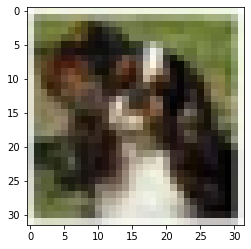

In [2]:
im = x_train[500]
plt.imshow(im)
print(y_train[500])

In [3]:
x_train, x_test = x_train/255. , x_test/255.
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test, (Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (50000, 3072)
x_test:  (10000, 3072)
y_train:  (50000, 10)
y_test:  (10000, 10)


In [4]:
print(y_train[500])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [5]:
def calc_accuracy(x,y):
    f = np.matmul(x, w1) + b1
    pred = np.zeros(f.shape)
    pred[np.arange(f.shape[0]), np.argmax(f, axis=1)] = 1
    same = 0
    m = x_test.shape[0]
    for i in range(m):
        if( np.array_equal(pred[i],y_train[i]) ):
            same +=1
    accuracy = 100*same/m
    return accuracy

In [6]:
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros((1,K))
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr
iterations = 300
lr = 0.014
lr_decay= 0.999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    # Forward pass

    X = x_train[indices]
    Y = y_train[indices]

    f = np.matmul(X, w1) + b1
    dy = f-Y
    loss = (1/(2*batch_size))*np.square(dy).sum() + (1./(2*batch_size))*reg*np.sum(w1**2)
    loss_history.append(loss)
    if t%20==0:
        print("t = ",t," ;loss = ",loss)
    
    # Backward pass
    dw1 = (1/batch_size)* np.matmul(X.T, dy) + 2*reg*w1
    db1 = (1/batch_size)* np.sum(dy, axis = 0)

    w1 -= lr*dw1
    b1 -= lr*db1
    lr = lr_decay*lr

    train_acc_history.append( calc_accuracy(x_train,y_train) )
    val_acc_history.append( calc_accuracy(x_test,y_test) )




w1: (3072, 10)
b1: (1, 10)
t =  0  ;loss =  0.5000051358622808
t =  20  ;loss =  0.43867137470475287
t =  40  ;loss =  0.42169878708962266
t =  60  ;loss =  0.4122787823020999
t =  80  ;loss =  0.4066596792143964
t =  100  ;loss =  0.40314961627781615
t =  120  ;loss =  0.4008554589747415
t =  140  ;loss =  0.39928351472169354
t =  160  ;loss =  0.3981534750275832
t =  180  ;loss =  0.39730254400170245
t =  200  ;loss =  0.39663405861511575
t =  220  ;loss =  0.39608928627835066
t =  240  ;loss =  0.3956316489798022
t =  260  ;loss =  0.3952377487219319
t =  280  ;loss =  0.394892180026913


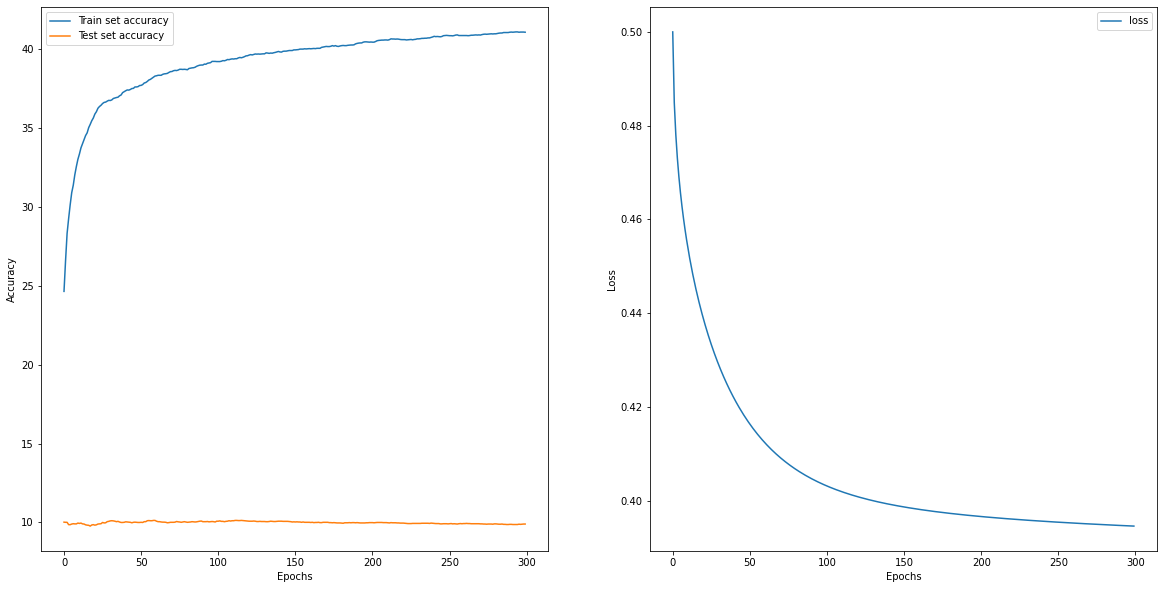

In [7]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].plot(train_acc_history, label='Train set accuracy')
ax[0].plot(val_acc_history, label = 'Test set accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='upper left')

ax[1].plot(loss_history, label='loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='upper right')

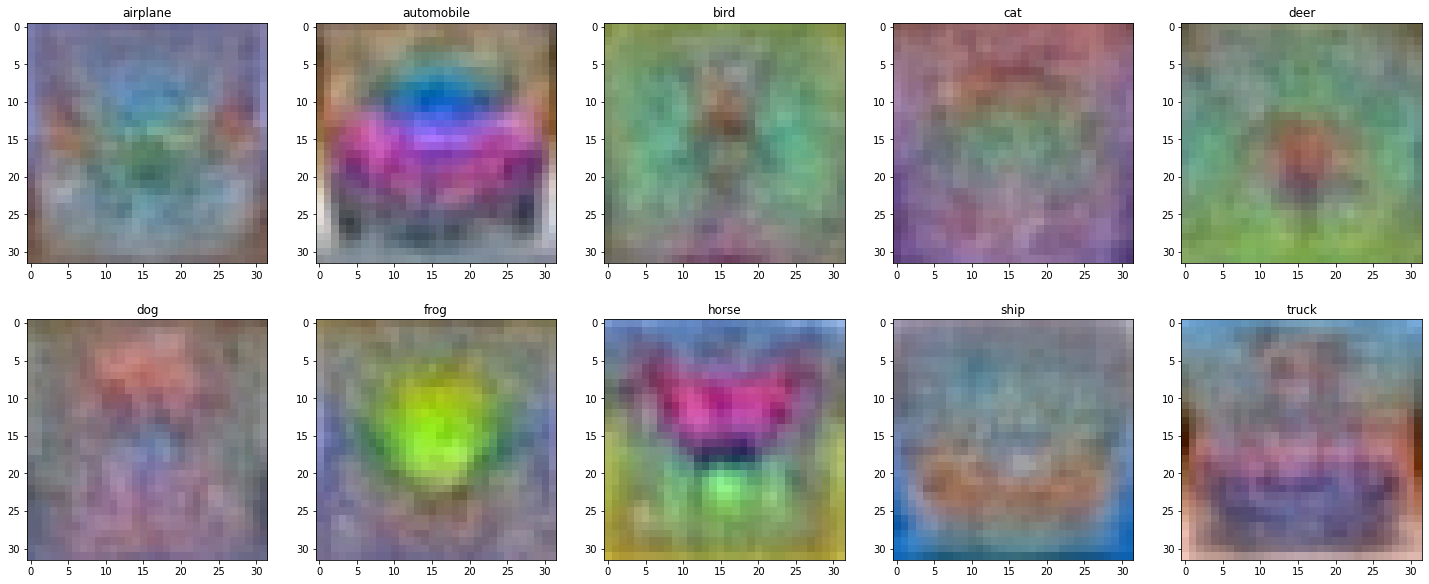

In [10]:
w1_pos = w1-np.min(w1)
images = ((w1_pos/np.max(w1_pos))*255).astype('uint8')
CIFAR10 = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig, ax = plt.subplots(2,5,figsize=(25,10))
for i in range(2):
    for j in range(5):
        im = images[:,(5*i+j)]
        im = np.reshape(im,(32,32,3))
        ax[i,j].imshow(im)
        ax[i,j].set_title(CIFAR10[5*i+j])

In [11]:
print(loss_history[-1])
print(train_acc_history[-1])
print(val_acc_history[-1])

0.3945990920988414
41.08
9.9
